In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df = sns.load_dataset("penguins")
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [7]:
#cleaning of dataset, eliminating the rows with missing data
df_sub = df[df['species'] != 'Chinstrap']
df_final = df_sub.dropna()
df_final.reset_index(inplace = True, drop = True)

In [8]:
df_final.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


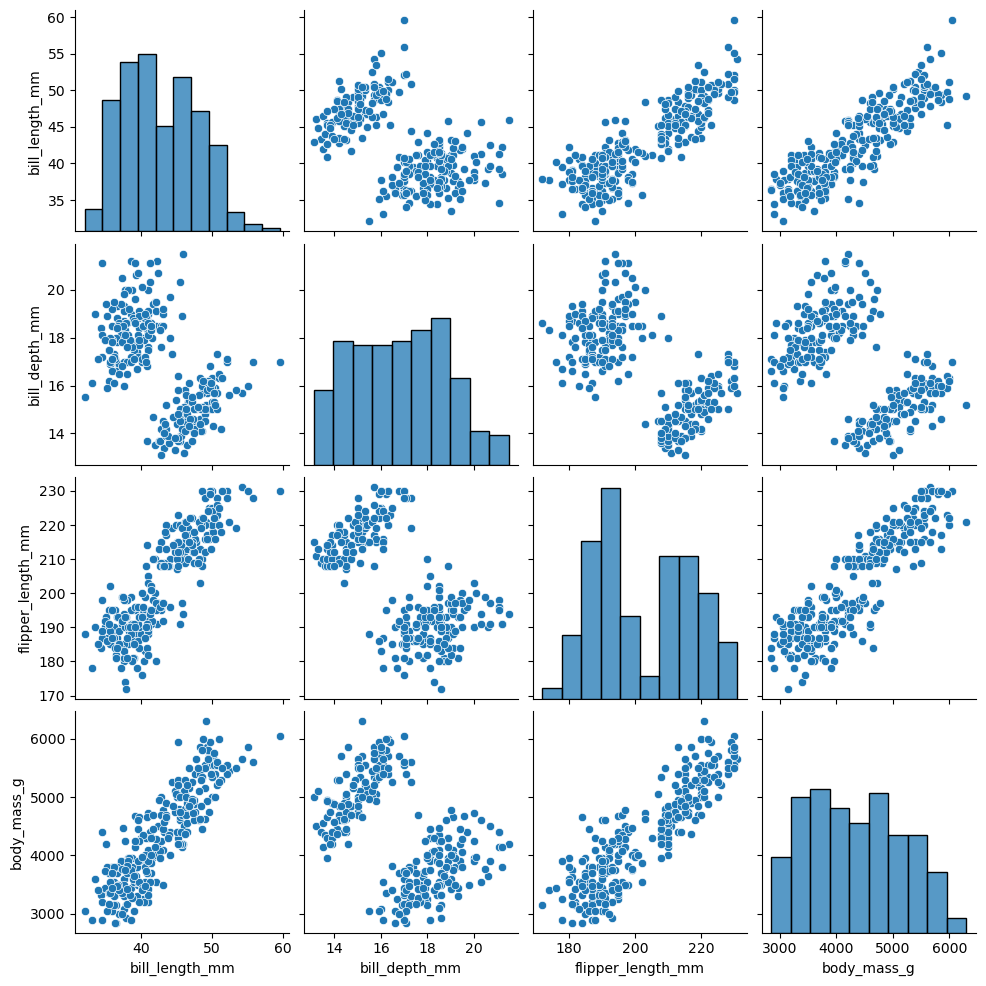

In [9]:
sns.pairplot(df_final)

In [11]:
#Subsetting of the data
ols_data = df_final[['bill_depth_mm', 'body_mass_g']]

In [12]:
# y or dependent variable comes before the ~, and the x or independent variables comes after the ~.
#writting out the formular
ols_formular = "body_mass_g ~ bill_depth_mm"

In [14]:
#Building the simple linear regression model in statsmodels using ols() function
from statsmodels.formula.api import ols

In [17]:
#Building OLS, fit model to data, plug in the ols_formular and ols_data as arguments in the ols() function
OLS = ols(formula = ols_formular, data = ols_data)
model = OLS.fit()

In [18]:
# call the summary() function on the model object to get the coefficients and more statistics about the model.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     80.12
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           6.53e-17
Time:                        19:07:20   Log-Likelihood:                -2124.6
No. Observations:                 265   AIC:                             4253.
Df Residuals:                     263   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7729.3410    382.601     20.202      0.000    6975.989    8482.693
bill_depth_mm  -201.9079     22.557     -8.951      0.000    -246.323    -157.493
==============================================================================
Omnibus:                       10.301   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.438
Skew:                           0.129   Prob(JB):                       0.0659
Kurtosis:                       2.347   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sns.regplot(x = 'bill_depth_mm', y = 'body_mass_g', data = ols_data)

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

In [24]:
# check the model assumptions and create relevant visualizations
# Subset X variable
X = ols_data["bill_depth_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [25]:
#you can save the model residuals as a variable by using the model.resid attribute.
# Calculate residuals
residuals = model.resid

# Check the normality assumption

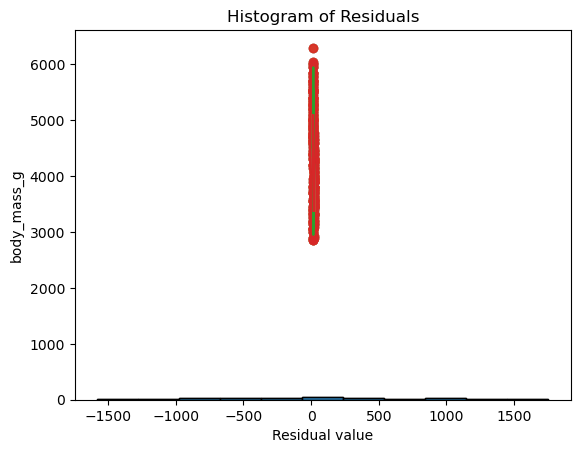

In [27]:
# checking the normality assumption, so we create a histogram of the residuals using the histplot() function
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel('Residual value')
fig.set_title('Histogram of Residuals')
plt.show()

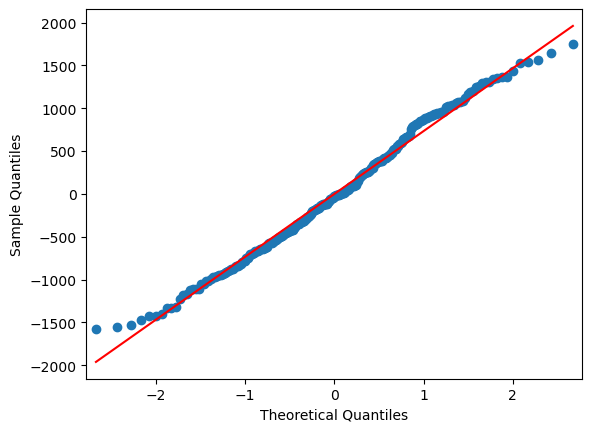

In [28]:
# Residuals are normally distributed, 
# you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot.
# creating a Q-Q plot by using the qqplot function from the statsmodels.api package.

import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

# Check the homoscedasticity assumption

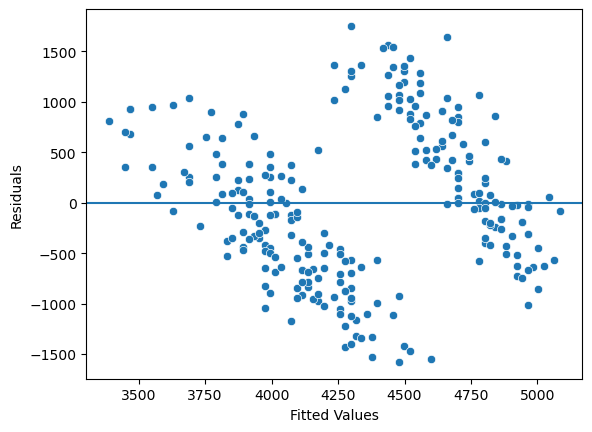

In [29]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()